# Work area for Floris.

contains:
 - bar graph of game count per genre per platform
 - log log plot of the correlation between score and sales
 - pearson coefficients to test for correlations/dependencies between variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt                    
from scipy.stats.stats import pearsonr
import csv

key_title = 'title'
key_platform = 'platform'
key_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'
key_const = 'constant_one'

keys = [key_title, key_platform, key_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global, key_const]

def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][key_score] = float(data[i][key_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])
        data[i][key_const] = 1

def get_beautiful_dict(file_name):    
    fin = open(file_name, 'r')
    file_data = csv.DictReader(fin)

    data = [row for row in file_data]      
    beautify_dict(data)
    return data

data = get_beautiful_dict('data/our_data.csv')
data_xbox = get_beautiful_dict('data/our_data_Xbox.csv')
data_playstation = get_beautiful_dict('data/our_data_PlayStation.csv')
data_nintendo = get_beautiful_dict('data/our_data_Nintendo.csv')
data_pc = get_beautiful_dict('data/our_data_PC.csv')

print(len(data))

7003


## some utility functions

In [2]:
def get_all_from_data(key, data):
    return [row[key] for row in data]

def get_unique_from_data(key, data):
    return list(set(get_all_from_data(key, data)))

def calc_r(data_set1, data_set2):
    r, p = pearsonr(data_set1, data_set2)
    return r

def calc_r_key(key1, key2, data):
    return calc_r(get_all_from_data(key1, data), get_all_from_data(key2, data))

def split_categorical_key(key, data):
    res_data = [dict() for row in data]
    
    categories = get_unique_from_data(key, data)
    
    for i, row in enumerate(res_data):
        for cat in categories:
            if cat == data[i][key]:
                row[cat] = 1
            else:
                 row[cat] = 0
    
    return categories, res_data

def from_lod_to_dol(data):
    res = dict()
    for key in data[0]:
        res[key] = [data[0][key]]
        
    for i in range(1, len(data)):
        for key in data[i]:
            res[key].append(data[i][key])
            
    return res

## prefetch some usefull data

In [3]:
genres = get_unique_from_data(key_genre, data)
platforms = get_unique_from_data(key_platform, data)
publishers = get_unique_from_data(key_publisher, data)
scores = get_all_from_data(key_score, data)
sales = get_all_from_data(key_global, data)

## A plot of the game count per genre per platform

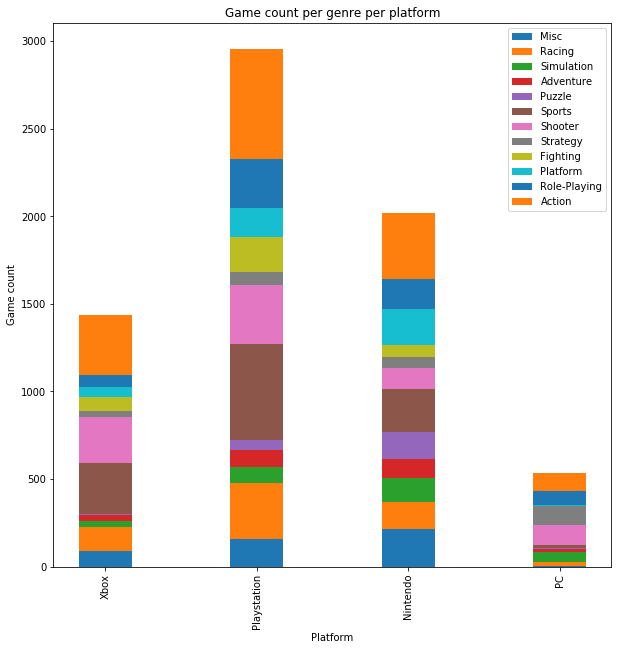

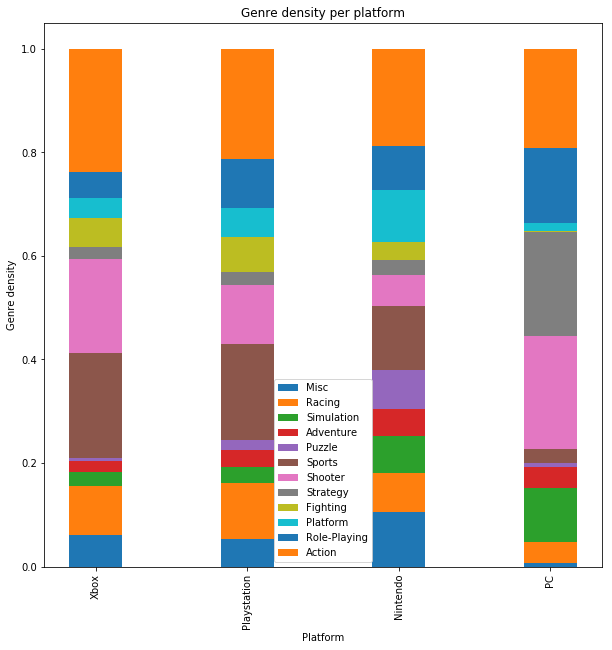

In [4]:
count_per_platform_per_genre = [[0 for _ in range(4)] for g in genres]
for i, g in enumerate(genres):
    for row in data_xbox:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][0] += 1
    
    for row in data_playstation:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][1] += 1            
    
    for row in data_nintendo:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][2] += 1            
    
    for row in data_pc :
        if row[key_genre] == g:
            count_per_platform_per_genre[i][3] += 1
plots = []
plt.figure(figsize=(10, 10))

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), count_per_platform_per_genre[i], 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Game count')
plt.xlabel('Platform')
plt.title('Game count per genre per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

# normalized version
plots = []
plt.figure(figsize=(10, 10))

total = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    total = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(total)]
    

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), [c / total[j] for j, c in enumerate(count_per_platform_per_genre[i])] , 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] / total[j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Genre density')
plt.xlabel('Platform')
plt.title('Genre density per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

## a plot showing the correlation between the score and sales figures

The pearson correlation coefficient between these two is roughly 0.22, indicating a mild but present correlation. The plot is shown with log scales on both the y axis to better represent the small distances in the low values and the large differences in the high values of the sales data. It shows a clear correlation between score and sales.

Pearson correlation coefficient (r) between the score and the global sales: 0.2296


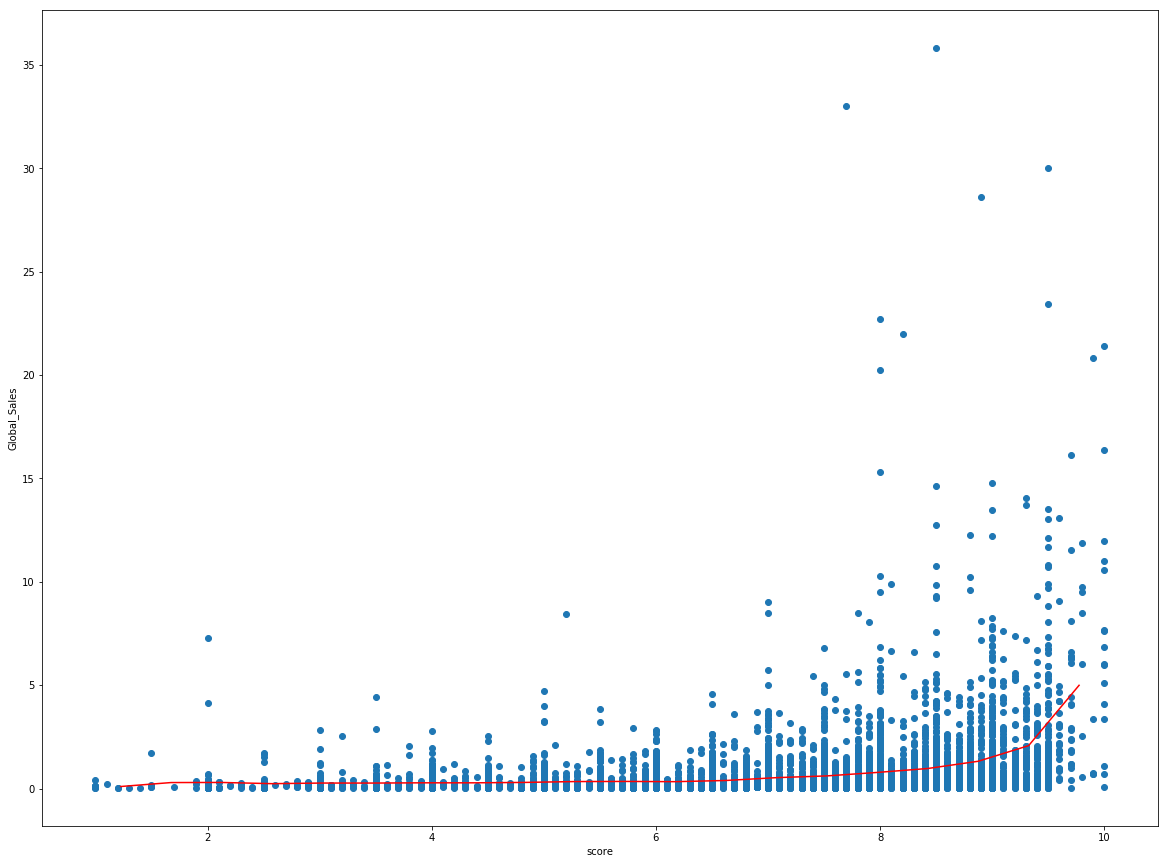

In [5]:
print("Pearson correlation coefficient (r) between the score and the global sales: {:.4}".format(calc_r_key(key_score, key_global, data)))

#points = [(scores[i], sales[i]) for i in range(len(scores))]
points = [(scores[i], sales[i]) for i in range(len(scores)) if sales[i] < 60]
points = sorted(points, key=lambda x: x[0])
num_bins = 20
bins = [0.0 for _ in range(num_bins)]
avgs = [0.0 for _ in range(num_bins)]
for i in range(num_bins):
    mi = 1 + 9/num_bins * i
    ma = mi + 9/num_bins
    avgs[i] = mi + 1/2 * 9/num_bins
    num_in_bin = 0
    for x, y in points:
        if x >= mi and x <= ma:
            bins[i] += y
            num_in_bin += 1
    bins[i] /= num_in_bin

plt.figure(figsize=(20, 15))
plt.plot(avgs, bins, c='r')
plt.scatter([x for x, y in points], [y for x, y in points])
plt.xlabel(key_score)
plt.ylabel(key_global)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

## Tracking of correlation between variables

We want to use a multi-linear regression model, but for that we need to prove that there is no correlation between variables so that they won't influence the model. The model should predict sales, so we want to have a correlation between sales and the variables, but not between any other variables. The variables we use in our model are genre, score and release quarter.

As you can see from the corresponding plots below, there is a clear correlation between the quarter and sales. Sales increases in Q3 and Q4, but only for the high end. The average stays roughly the same.

There is also a clear correlation between sales and genre, with a big difference in sales per genre.

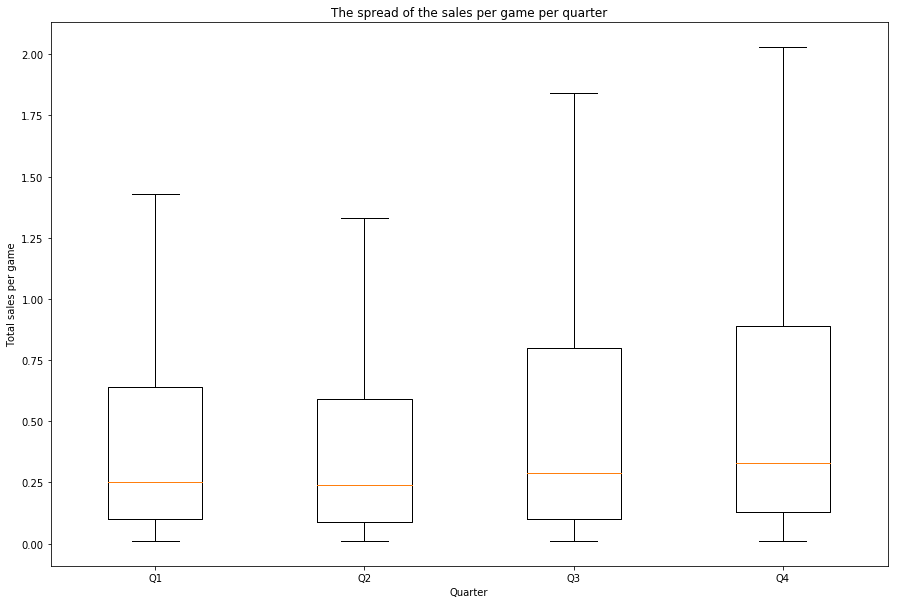

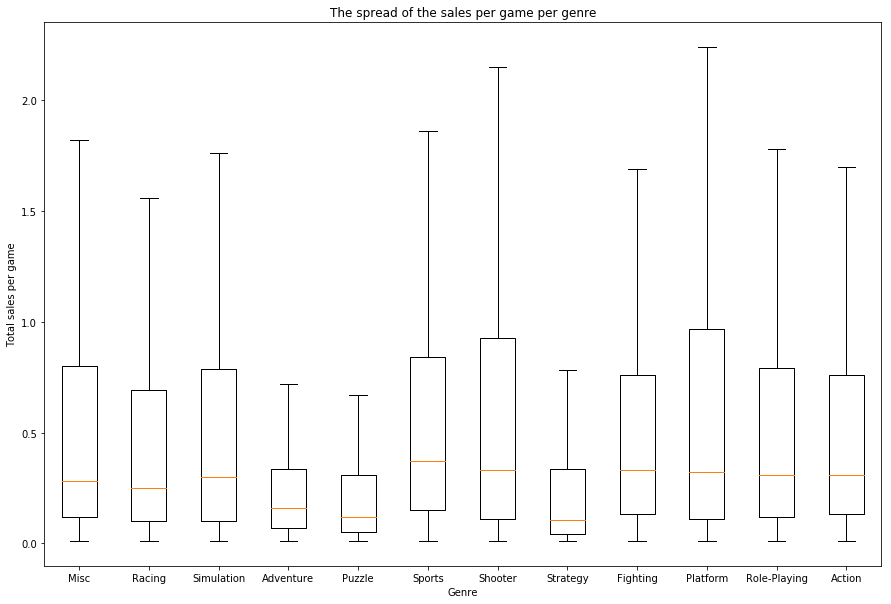

In [6]:
def plot_box_plot(categorie_data, categories, value_data, xlabel, ylabel, title):
    # box plot of sales per quarter
    value_per_categorie = [[] for _ in range(len(categories))]
    for i, value in enumerate(value_data):
        for j, categorie in enumerate(categories):
            if categorie_data[categorie][i] == 1:
                value_per_categorie[j].append(value)

    plt.figure(figsize=(15, 10))
    plt.boxplot(value_per_categorie, 0, '')
    plt.xticks(range(1, len(categories) + 1), categories)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.show()
    
#scores and sales already exist
# categorical data
genres, genre_data = split_categorical_key(key_genre, data)
quarters, quarter_data = split_categorical_key(key_release_q, data)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre')


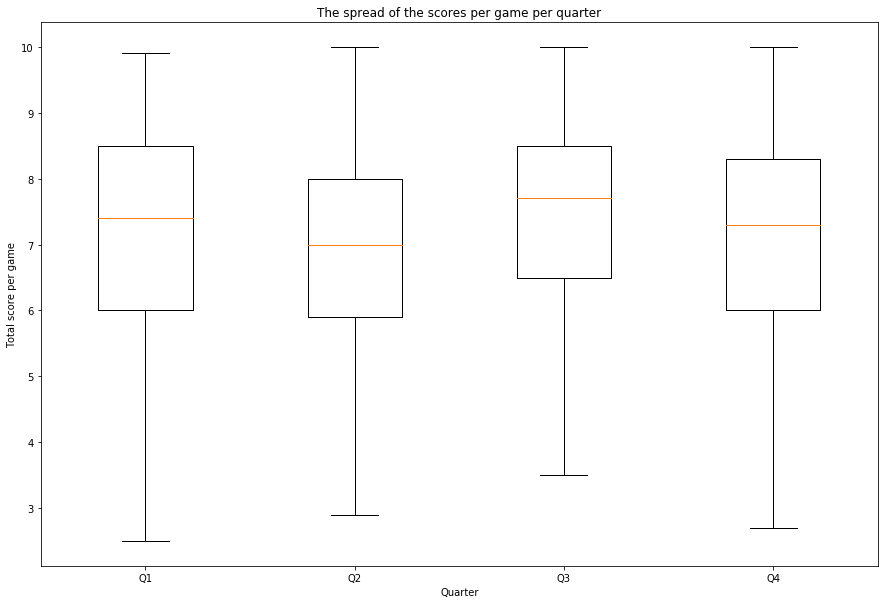

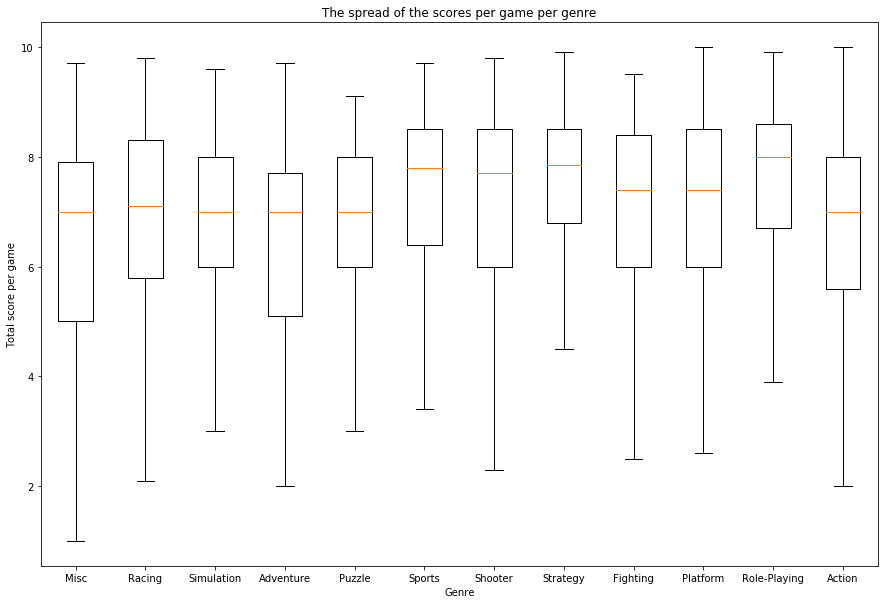

In [7]:

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Total score per game', 'Quarter', 'The spread of the scores per game per quarter')
plot_box_plot(genre_data, genres, scores, 'Total score per game', 'Genre', 'The spread of the scores per game per genre')


## Next step: see if this remains the same when plotting for xbox, playstation, nintendo or pc. How does it change?

I expect that different genres especially differ greatly for each of these 4, but that quarters remain roughly the same.

### xbox

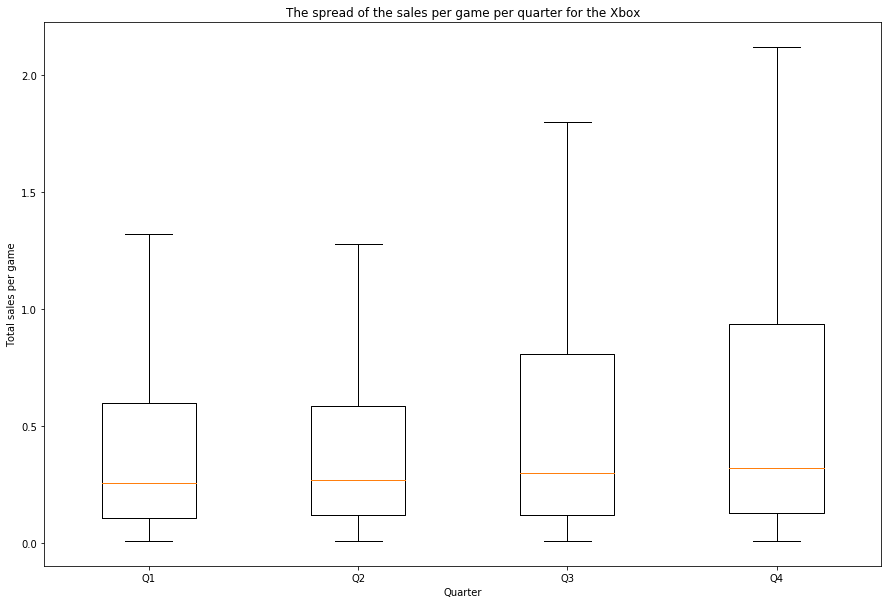

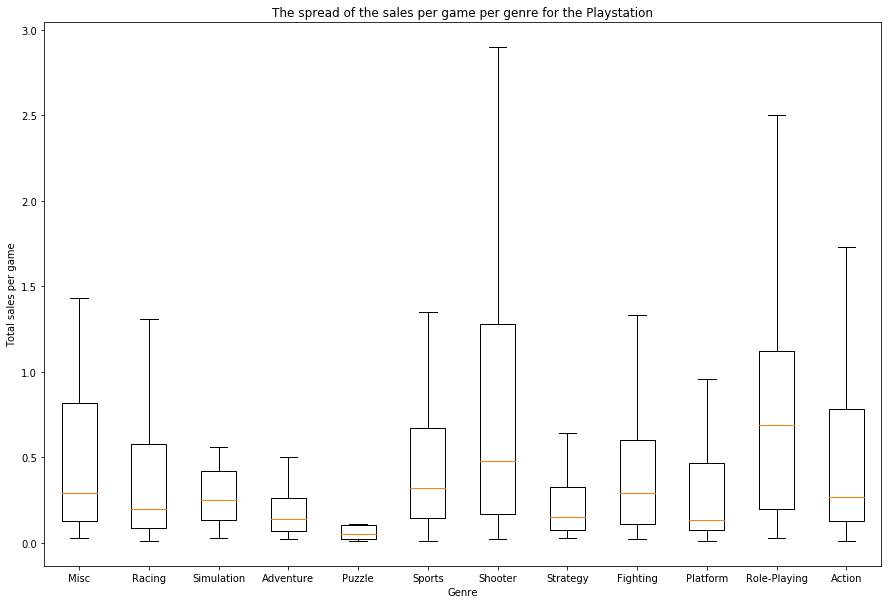

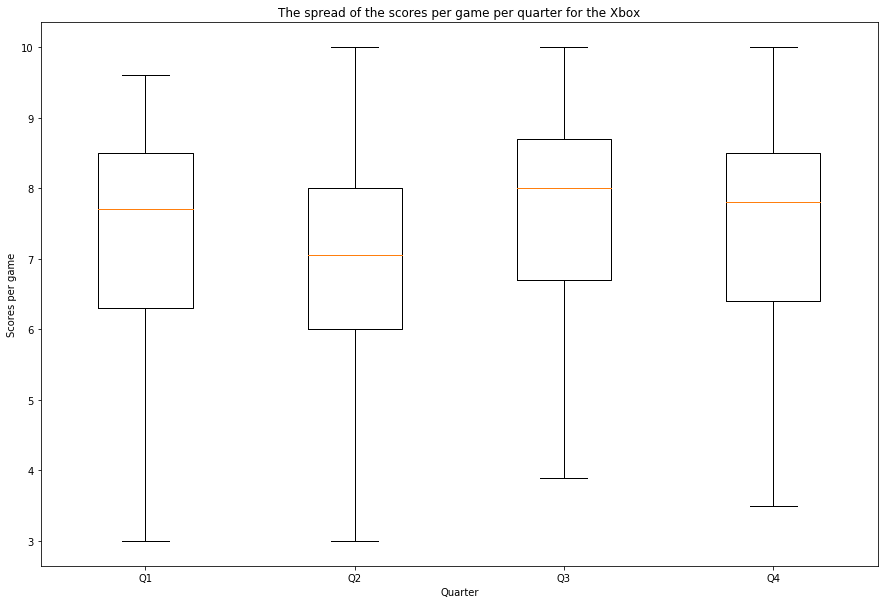

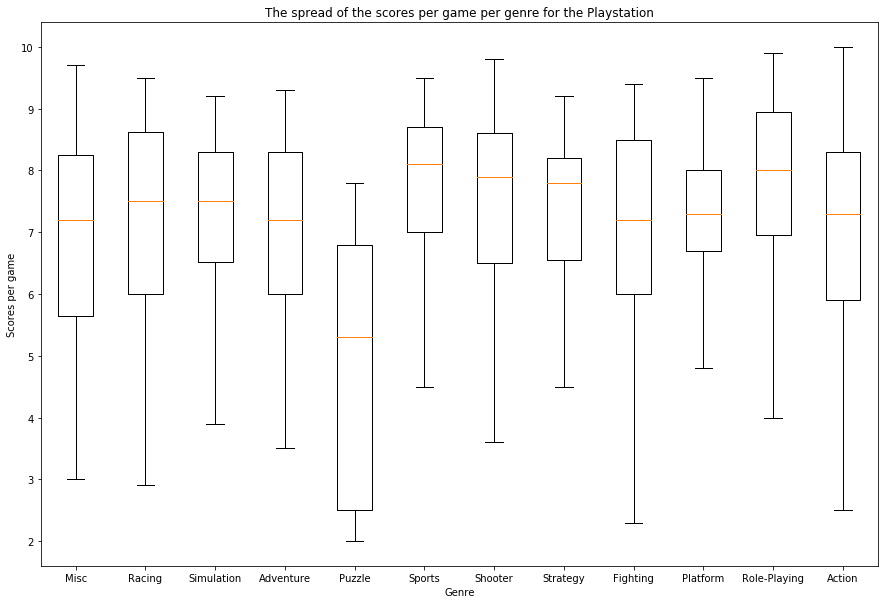

In [8]:
#scores and sales
scores = get_all_from_data(key_score, data_xbox)
sales = get_all_from_data(key_global, data_xbox)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_xbox)
quarters, quarter_data = split_categorical_key(key_release_q, data_xbox)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# xbox
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the Xbox')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the Playstation')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the Xbox')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the Playstation')


### playstation

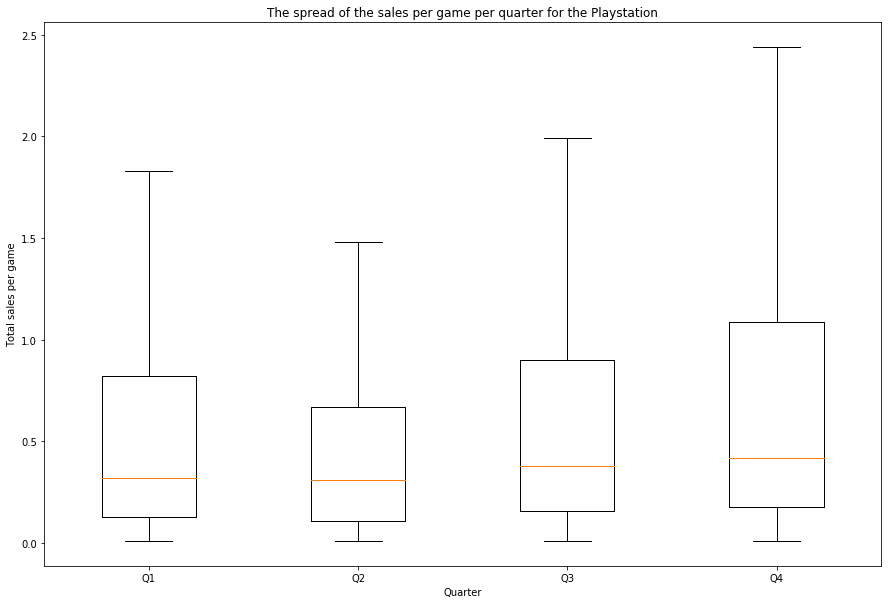

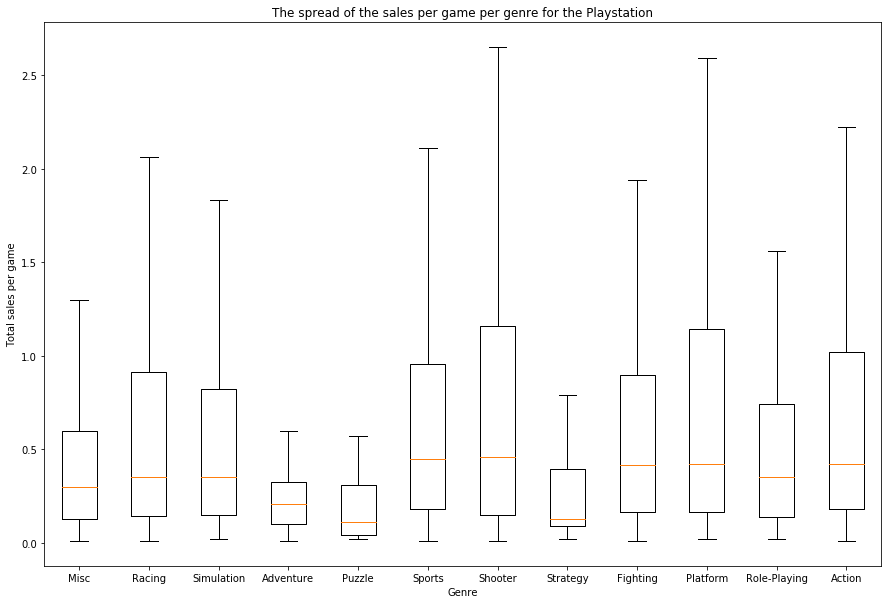

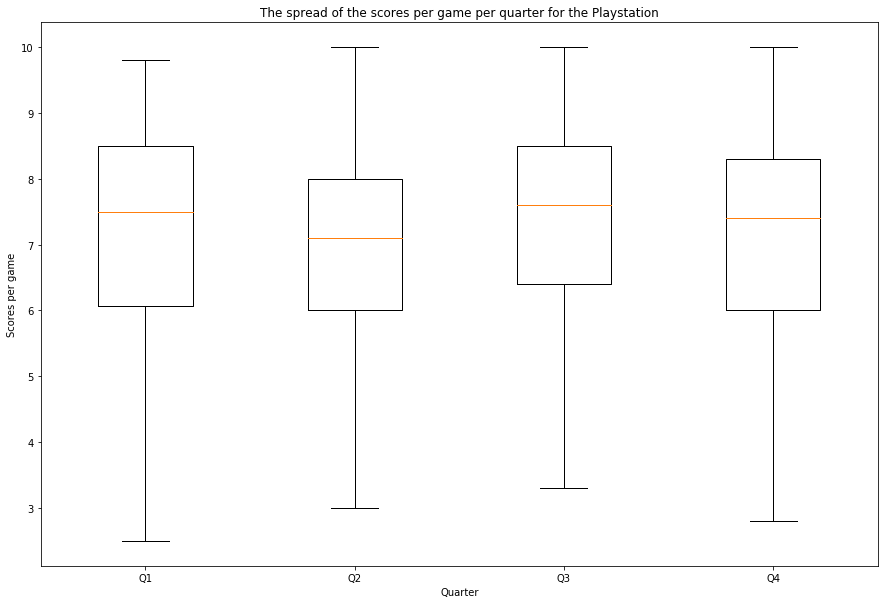

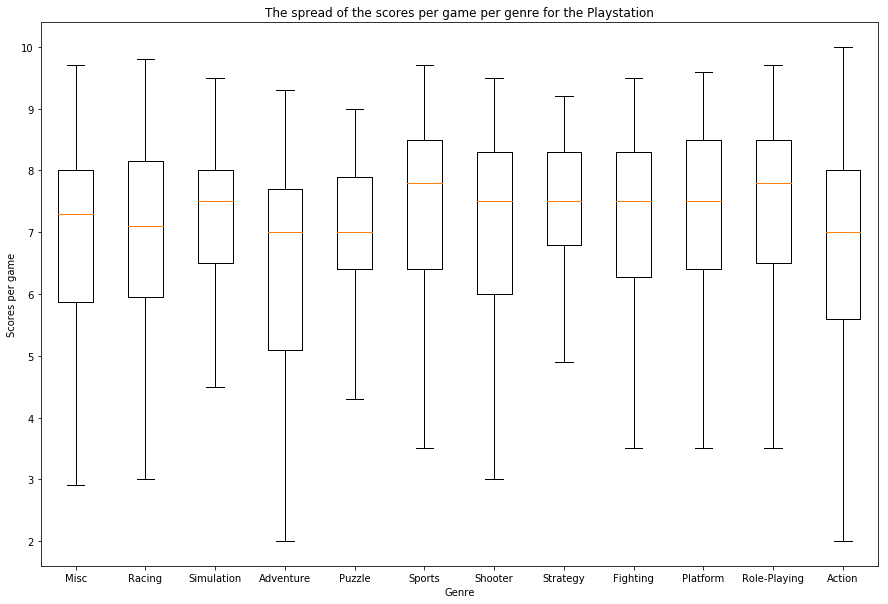

In [9]:
#scores and sales
scores = get_all_from_data(key_score, data_playstation)
sales = get_all_from_data(key_global, data_playstation)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_playstation)
quarters, quarter_data = split_categorical_key(key_release_q, data_playstation)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# xbox
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the Playstation')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the Playstation')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the Playstation')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the Playstation')


### nintendo

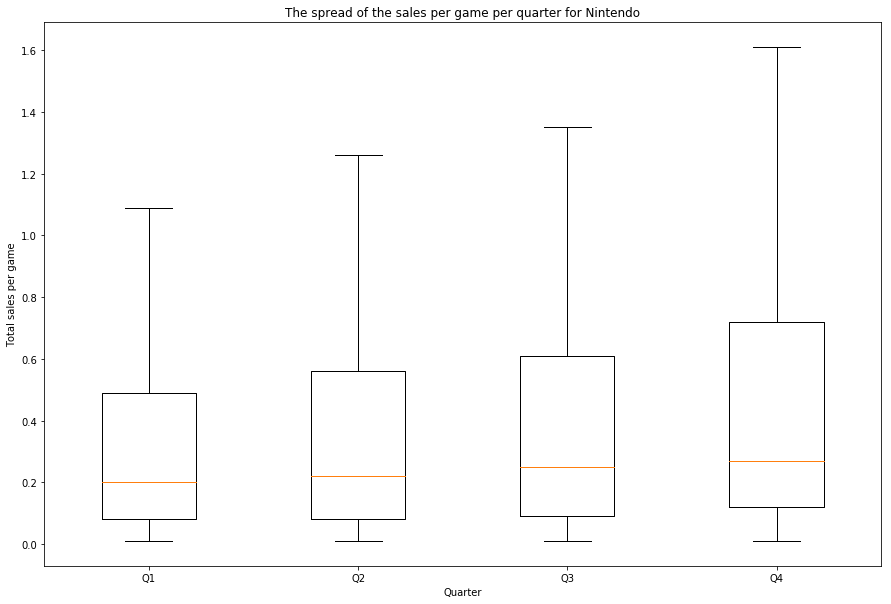

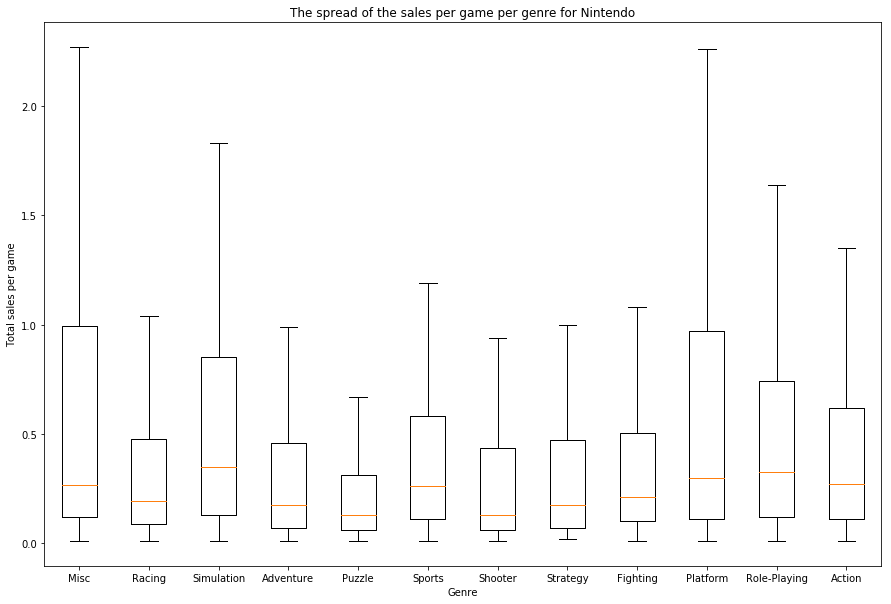

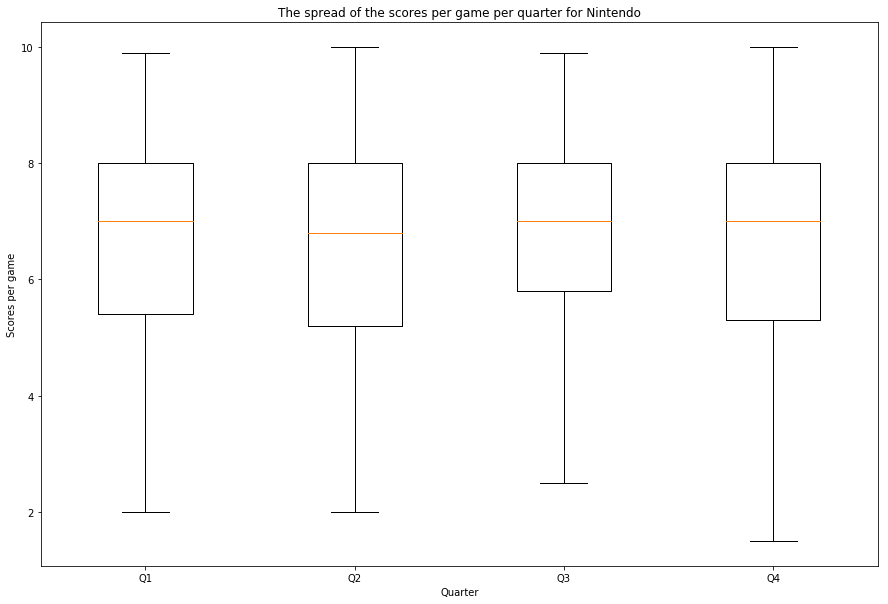

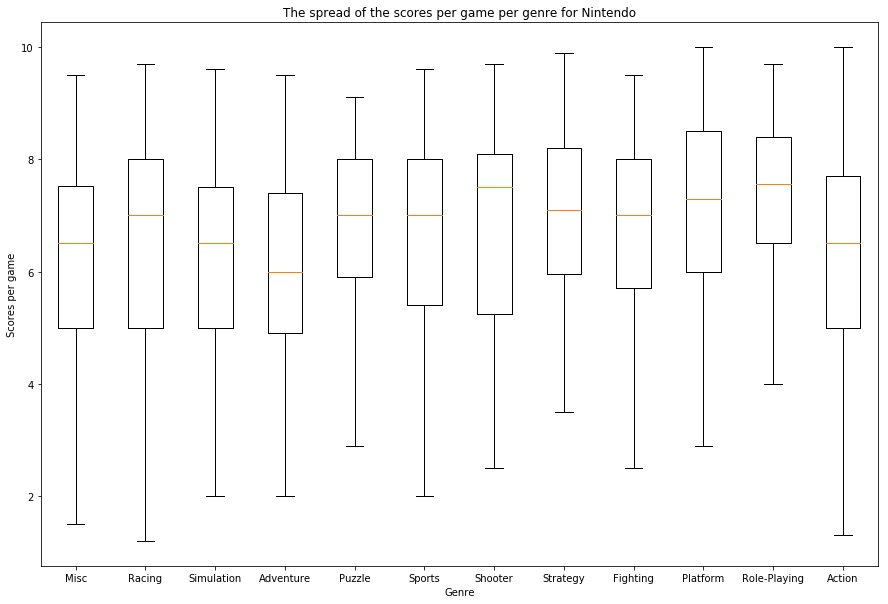

In [10]:
#scores and sales
scores = get_all_from_data(key_score, data_nintendo)
sales = get_all_from_data(key_global, data_nintendo)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_nintendo)
quarters, quarter_data = split_categorical_key(key_release_q, data_nintendo)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# nintendo
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for Nintendo')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for Nintendo')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for Nintendo')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for Nintendo')


### pc

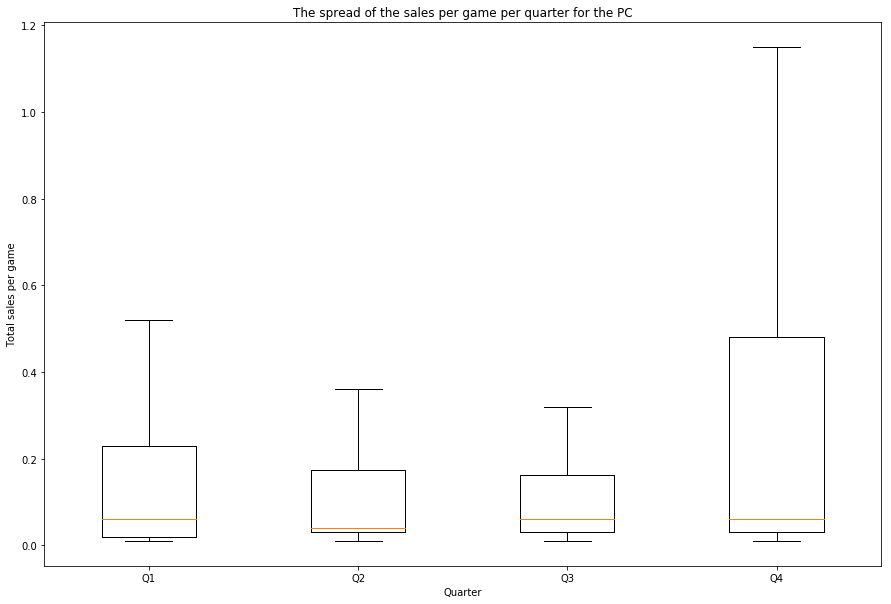

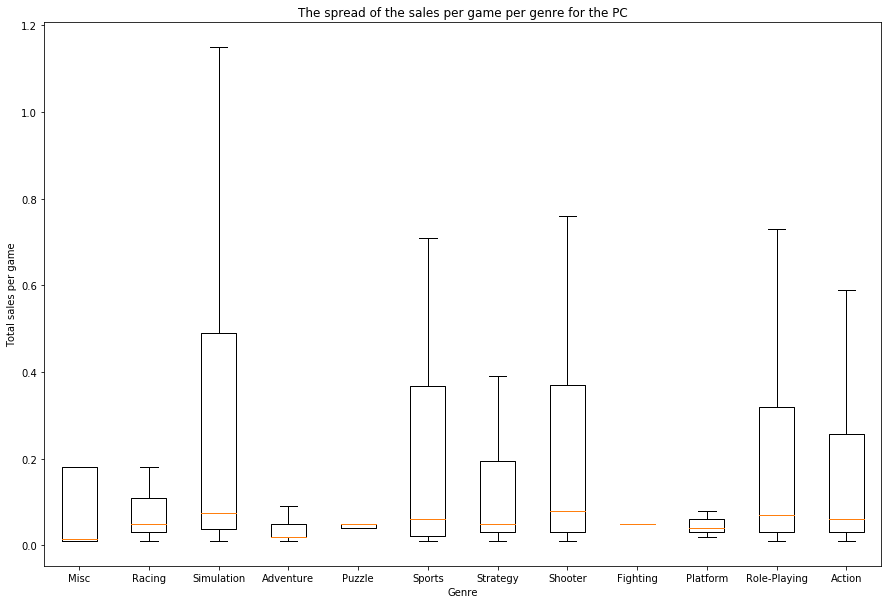

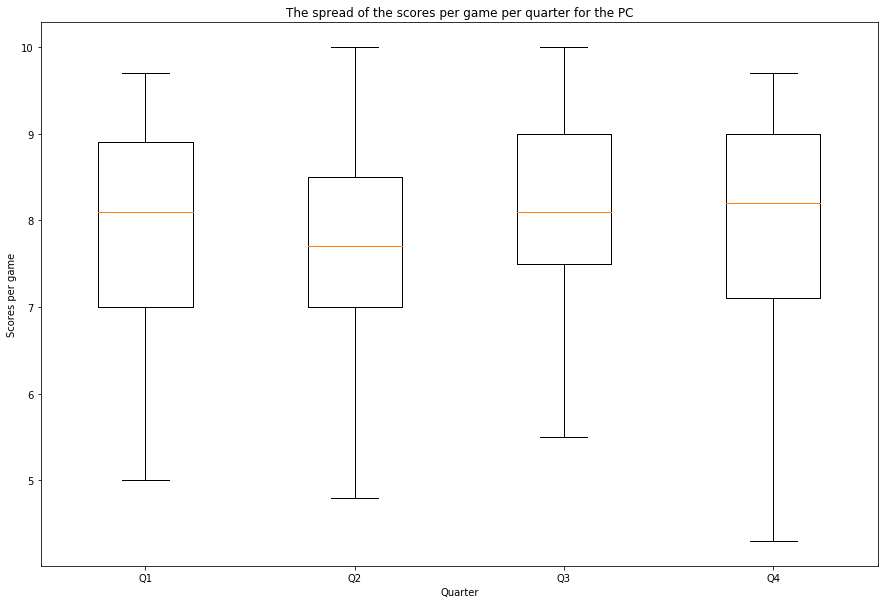

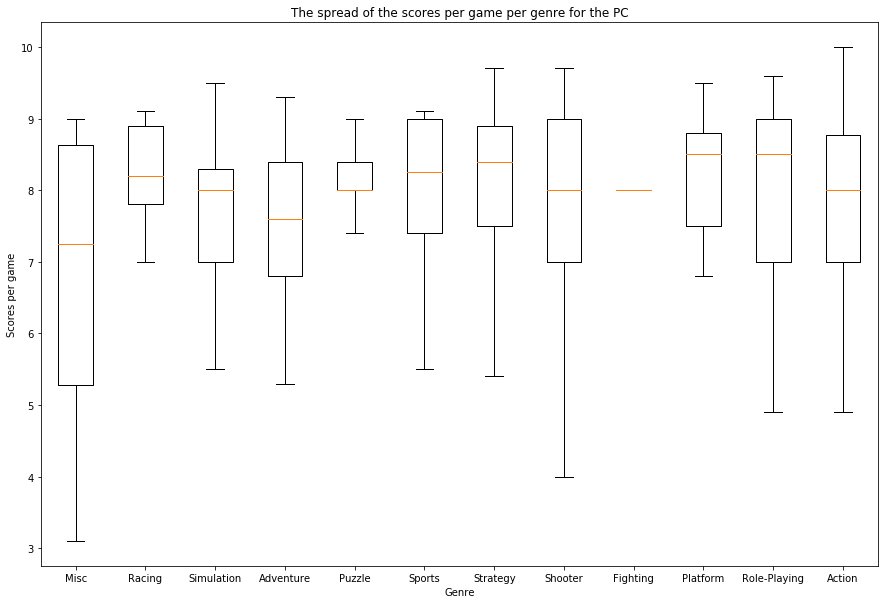

In [11]:
#scores and sales
scores = get_all_from_data(key_score, data_pc)
sales = get_all_from_data(key_global, data_pc)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_pc)
quarters, quarter_data = split_categorical_key(key_release_q, data_pc)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# pc
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the PC')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the PC')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the PC')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the PC')

In [12]:
#reset variables#scores and sales
scores = get_all_from_data(key_score, data)
sales = get_all_from_data(key_global, data)

# categorical data
genres = get_unique_from_data(key_genre, data)
quarters = get_unique_from_data(key_release_q, data)

Do you think it worked? There seems to be a great difference in genres between platforms, less so for quarters. To quantify this difference, up next is... 

# Cosine similarity matrices

I will check the cosine similarity between each genre, and display a heatmap with values depicting the differences and similarities between platforms with different metrics: top x percent score, bottom x percent score, median score and those three for sales, for both genres and quarters. Twelve graphs.

In [13]:
# define the functions needed to calculate the cosine similarity
def magnitude(v):
    sqr_mag = 0
    for val in v:
        sqr_mag += val * val
    return sqr_mag ** (1/2)

def normalized(v):
    mag = magnitude(v)
    return [val / mag for val in v]

def dot(v1, v2):
    d = 0
    for i in range(len(v1)):
        d += v1[i] * v2[i]
    return d
    
def cos_sim(v1, v2):
    norm_v1 = normalized(v1)
    norm_v2 = normalized(v2)
    return dot(norm_v1, norm_v2)

def mean(v):
    return sum(v)/len(v)

def lerp(a, b, v):
    #return (b - a) * v + a #this is faster but not numerically stable with a large difference between a and b
    return a * (1 - v) + b * v

def percentile(values, alpha):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]
    
    s = sorted(values)
    l = len(values) - 1
    
    idx_start = int(l * alpha)
    idx_end = idx_start + 1
    
    a = s[idx_start]
    b = s[idx_end]
    
    # linearly interpolate between the two values
    p_start = idx_start / l
    p_end = idx_end / l
    return lerp(a, b, (alpha - p_start) / (p_end - p_start))

# get the median of the value per categorie
def get_cat_mean_val(key_cat, key_val, data):
    # get the unique categories and create a dict with an empty list for each categorie
    categories = get_unique_from_data(key_cat, data)
    d = {}
    for cat in categories:
        d[cat] = []
        
    # store all values from the data set in the dictionary
    for row in data:
        d[row[key_cat]].append(row[key_val])
        
    # return a list of means
    return [mean(d[cat]) for cat in categories]

# get the interpolated value at the given percentile
def get_cat_percentile_val(p, key_cat, key_val, data):
    # get the unique categories and create a dict with an empty list for each categorie
    categories = get_unique_from_data(key_cat, data)
    d = {}
    for cat in categories:
        d[cat] = []
        
    # store all values from the data set in the dictionary
    for row in data:
        d[row[key_cat]].append(row[key_val])
        
    # return a list of means
    return [percentile(d[cat], p) for cat in categories]

def show_cos_sim_heatmap(dic, bar_label, title):    
    labels = [key for key in dic]

    values = [[1.0 for key in dic] for key in dic]
    for i, key_i in enumerate(dic):
        for j, key_j in enumerate(dic):
            if i is not j:
                values[i][j] = cos_sim(dic[key_i], dic[key_j])


    fig, ax = plt.subplots(figsize=(8, 5))
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, "{:.3f}".format(values[i][j]),
                       ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(bar_label, rotation=-90, va="bottom")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()


# get the data
genres, genre_data = split_categorical_key(key_genre, data)
quarters, quarter_data = split_categorical_key(key_release_q, data)

genres = get_unique_from_data(key_genre, data)
quarters = get_unique_from_data(key_release_q, data)


## Heatmaps of cosine similarities with genres, quarters, and means of scores and sales

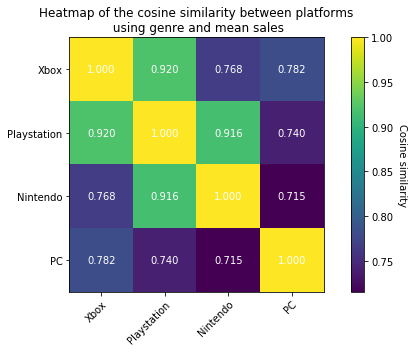

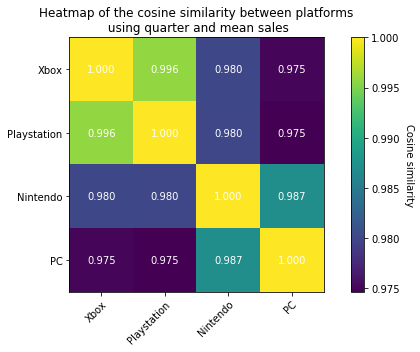

In [14]:

# heatmap genre sales
genre_sales_dict = {
    "Xbox":get_cat_mean_val(key_genre, key_global, data_xbox),
    "Playstation":get_cat_mean_val(key_genre, key_global, data_playstation),
    "Nintendo":get_cat_mean_val(key_genre, key_global, data_nintendo),
    "PC":get_cat_mean_val(key_genre, key_global, data_pc)
}
show_cos_sim_heatmap(genre_sales_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using genre and mean sales")

# heatmap quarter sales
quarter_sales_dict = {
    "Xbox":get_cat_mean_val(key_release_q, key_global, data_xbox),
    "Playstation":get_cat_mean_val(key_release_q, key_global, data_playstation),
    "Nintendo":get_cat_mean_val(key_release_q, key_global, data_nintendo),
    "PC":get_cat_mean_val(key_release_q, key_global, data_pc)
}
show_cos_sim_heatmap(quarter_sales_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using quarter and mean sales")


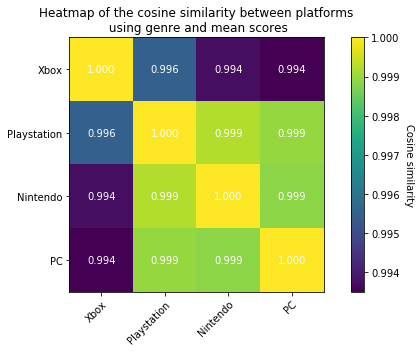

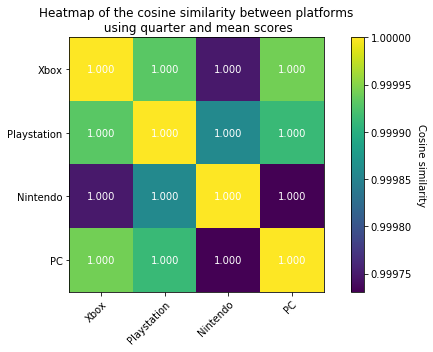

In [15]:

# heatmap genre scores
genre_scores_dict = {
    "Xbox":get_cat_mean_val(key_genre, key_score, data_xbox),
    "Playstation":get_cat_mean_val(key_genre, key_score, data_playstation),
    "Nintendo":get_cat_mean_val(key_genre, key_score, data_nintendo),
    "PC":get_cat_mean_val(key_genre, key_score, data_pc)
}
show_cos_sim_heatmap(genre_scores_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using genre and mean scores")

# heatmap quarter scores
quarter_scores_dict = {
    "Xbox":get_cat_mean_val(key_release_q, key_score, data_xbox),
    "Playstation":get_cat_mean_val(key_release_q, key_score, data_playstation),
    "Nintendo":get_cat_mean_val(key_release_q, key_score, data_nintendo),
    "PC":get_cat_mean_val(key_release_q, key_score, data_pc)
}
show_cos_sim_heatmap(quarter_scores_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using quarter and mean scores")


## And now with percentiles instead of means:

In [16]:
alpha = 0.9

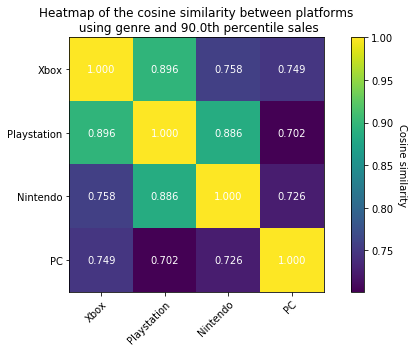

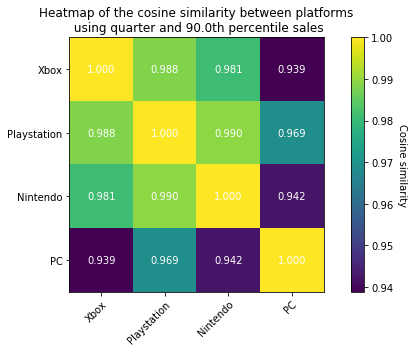

In [17]:
# heatmap genre sales
genre_sales_dict = {
    "Xbox":get_cat_percentile_val(alpha, key_genre, key_global, data_xbox),
    "Playstation":get_cat_percentile_val(alpha, key_genre, key_global, data_playstation),
    "Nintendo":get_cat_percentile_val(alpha, key_genre, key_global, data_nintendo),
    "PC":get_cat_percentile_val(alpha, key_genre, key_global, data_pc)
}
show_cos_sim_heatmap(genre_sales_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using genre and {:.1f}th percentile sales".format(alpha * 100))

# heatmap quarter sales
quarter_sales_dict = {
    "Xbox":get_cat_percentile_val(alpha, key_release_q, key_global, data_xbox),
    "Playstation":get_cat_percentile_val(alpha, key_release_q, key_global, data_playstation),
    "Nintendo":get_cat_percentile_val(alpha, key_release_q, key_global, data_nintendo),
    "PC":get_cat_percentile_val(alpha, key_release_q, key_global, data_pc)
}
show_cos_sim_heatmap(quarter_sales_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using quarter and {:.1f}th percentile sales".format(alpha * 100))


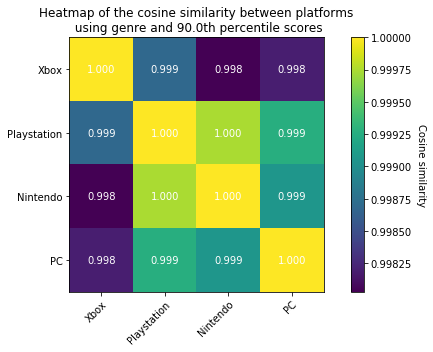

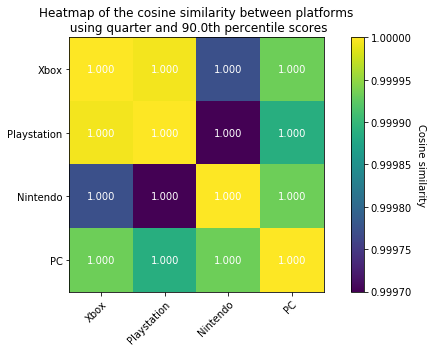

In [18]:

# heatmap genre scores
genre_scores_dict = {
    "Xbox":get_cat_percentile_val(alpha, key_genre, key_score, data_xbox),
    "Playstation":get_cat_percentile_val(alpha, key_genre, key_score, data_playstation),
    "Nintendo":get_cat_percentile_val(alpha, key_genre, key_score, data_nintendo),
    "PC":get_cat_percentile_val(alpha, key_genre, key_score, data_pc)
}
show_cos_sim_heatmap(genre_scores_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using genre and {:.1f}th percentile scores".format(alpha * 100))

# heatmap quarter scores
quarter_scores_dict = {
    "Xbox":get_cat_percentile_val(alpha, key_release_q, key_score, data_xbox),
    "Playstation":get_cat_percentile_val(alpha, key_release_q, key_score, data_playstation),
    "Nintendo":get_cat_percentile_val(alpha, key_release_q, key_score, data_nintendo),
    "PC":get_cat_percentile_val(alpha, key_release_q, key_score, data_pc)
}
show_cos_sim_heatmap(quarter_scores_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using quarter and {:.1f}th percentile scores".format(alpha * 100))


# Genre count per quarter, to see if those are correlated
I'll do both absolute count and normalized to see percentages

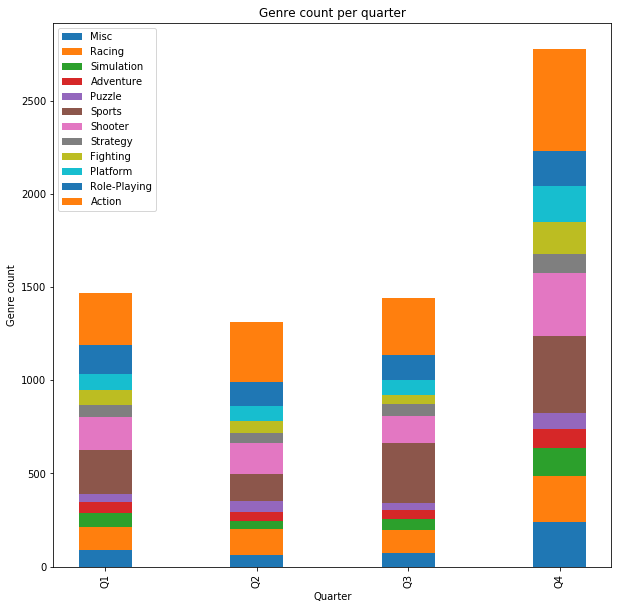

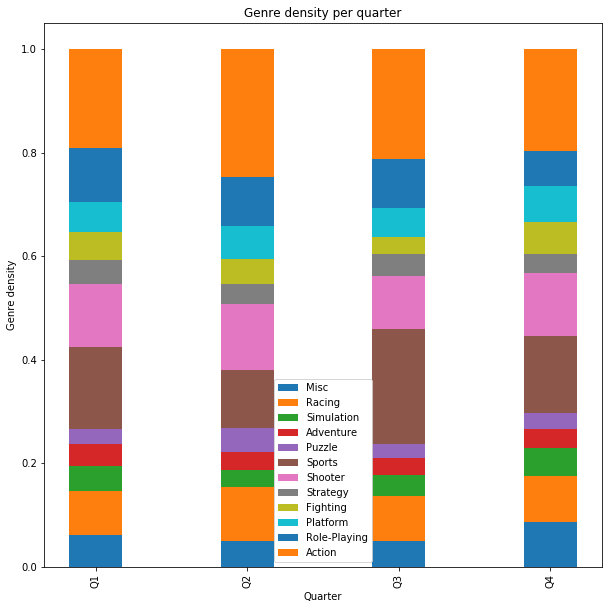

In [19]:
count_per_quarter_per_genre = [[0 for _ in range(4)] for g in genres]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for i, g in enumerate(genres):
    for row in data:
        if row[key_genre] == g:        
            for j, q in enumerate(quarters):
                if row[key_release_q] == q:
                    count_per_quarter_per_genre[i][j] += 1
                    break

plots = []
plt.figure(figsize=(10, 10))

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), count_per_quarter_per_genre[i], 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_quarter_per_genre[i][j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Genre count')
plt.xlabel('Quarter')
plt.title('Genre count per quarter')
plt.xticks(range(4), quarters, rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()


# normalized version
plots = []
plt.figure(figsize=(10, 10))

total = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    total = [s + count_per_quarter_per_genre[i][j] for j, s in enumerate(total)]
    

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), [c / total[j] for j, c in enumerate(count_per_quarter_per_genre[i])] , 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_quarter_per_genre[i][j] / total[j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Genre density')
plt.xlabel('Quarter')
plt.title('Genre density per quarter')
plt.xticks(range(4), quarters, rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

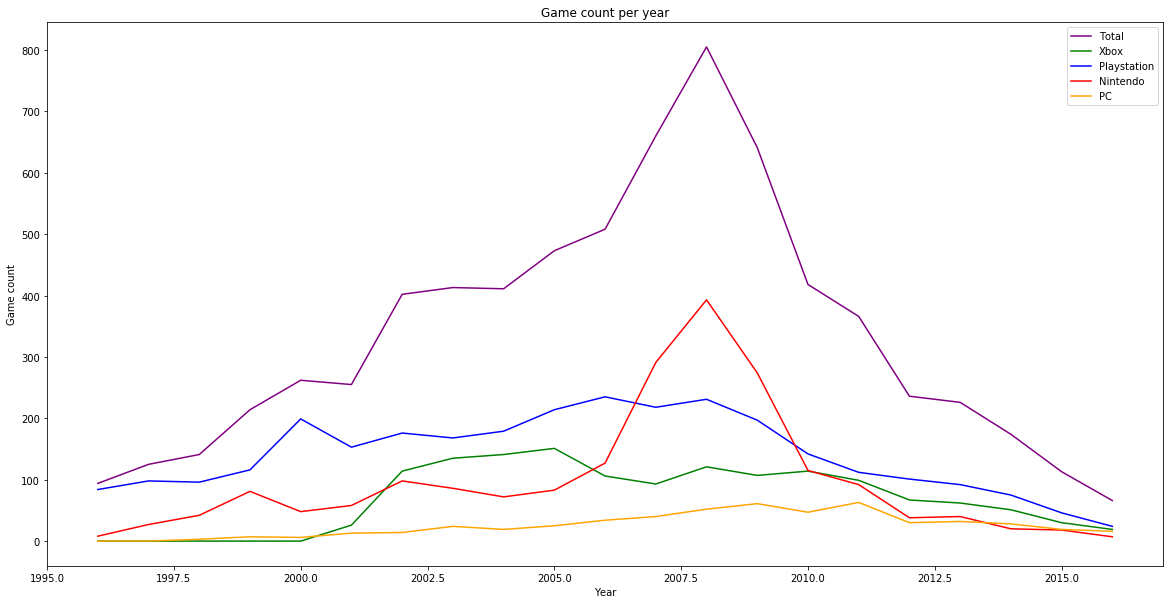

In [20]:
def plot_count_per_year(data, l, color):
    years = get_unique_from_data(key_release_y, data)
    count_per_year = [0 for y in range(1996, 2017)]
    for row in data:
        count_per_year[int(row[key_release_y]) - 1996] += 1

    plt.plot(range(1996, 2017), count_per_year, label=l, color=color)

plt.figure(figsize=(20, 10))
plot_count_per_year(data, 'Total', color='purple')
plot_count_per_year(data_xbox, 'Xbox', color='green')
plot_count_per_year(data_playstation, 'Playstation', color='blue')
plot_count_per_year(data_nintendo, 'Nintendo', color='red')
plot_count_per_year(data_pc, 'PC', color='orange')
plt.xlabel('Year')
plt.ylabel('Game count')
plt.title('Game count per year')
plt.legend()
plt.show()

## Plot of the accuracy with varying noise levels, including 95% confidence intervals

In [70]:
import pandas as pd
import statsmodels.formula.api as smf

def find_max_saled_game_in_dict_with_key(dictio, key):
    max_val = 0.0
    max_row = None
    for row in dictio:
        if float(row[key]) > max_val:
            max_val = float(row[key])
            max_row = row
    if max_row == None:
        max_row = {key_title: '---------', key_genre: '--', key_global: 0}
    return max_row

def get_big_hits_for_year(year, data, key):
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    the_hit = []
    for row in data:
        if row[key_release_y] == year:
            if row[key_release_q] is 'Q1':
                quarter1.append(row)
            elif row[key_release_q] is 'Q2':
                quarter2.append(row)
            elif row[key_release_q] is 'Q3':
                quarter3.append(row)
            elif row[key_release_q] is 'Q4':
                quarter4.append(row)

    max1 = find_max_saled_game_in_dict_with_key(quarter1, key)
    max2 = find_max_saled_game_in_dict_with_key(quarter2, key)
    max3 = find_max_saled_game_in_dict_with_key(quarter3, key)
    max4 = find_max_saled_game_in_dict_with_key(quarter4, key)
    hit = find_max_saled_game_in_dict_with_key([max1, max2, max3, max4], key)
    
    return max1, max2, max3, max4, hit

def calc_LinR_model_Cat(data, sort_req = 2): 
    df1 = pd.DataFrame(data[0], columns=our_keys)
    df2 = pd.DataFrame(data[1], columns=our_keys)
    df3 = pd.DataFrame(data[2], columns=our_keys)
    df4 = pd.DataFrame(data[3], columns=our_keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    
    if sort_reg == 2:
        f = key_global + ' ~ ' + key_const + ' + ' + key_score + ' + C(' + key_genre + ')' + ' + ' + key_score + ' * C(' + key_genre + ')'
    elif sort_reg == 1:
        f = key_global + ' ~ ' + key_const + ' + ' + key_score + ' + C(' + key_genre + ')'
    else:
        f = key_global + ' ~ ' + key_const + ' + C(' + key_genre + ')'

    fit1 = smf.ols(formula=f, data=df1).fit()
    fit2 = smf.ols(formula=f, data=df2).fit()
    fit3 = smf.ols(formula=f, data=df3).fit()
    fit4 = smf.ols(formula=f, data=df4).fit()    
    
    return fit1, fit2, fit3, fit4

def calc_LinR_model_Cat_in_years(data, sort_reg = 2):    
    df = pd.DataFrame(data, columns=keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    
    if sort_reg == 2:
        f = key_global + ' ~ ' + ' + ' + key_score + ' + C(' + key_genre + ')' + ' + C(' + key_genre + ') * ' + key_score
    elif sort_reg == 1:
        f = key_global + ' ~ ' + ' + ' + key_score + ' + C(' + key_genre + ')'
    else:
        f = key_global + ' ~ ' + ' + C(' + key_genre + ')'
  
    return smf.ols(formula=f, data=df).fit()

# Gets the games of all the data, splits it in quarters.
def get_games_of_year_in_quarters(begin_year, end_year, data):  
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    for row in data:
        if int(row[key_release_y]) <= end_year and int(row[key_release_y]) >= begin_year:
            if row[key_release_q] == 'Q1':
                quarter1.append(row)
            elif row[key_release_q] == 'Q2':
                quarter2.append(row)
            elif row[key_release_q] == 'Q3':
                quarter3.append(row)
            elif row[key_release_q] == 'Q4':
                quarter4.append(row)
    return quarter1, quarter2, quarter3, quarter4, quarter1 + quarter2 + quarter3 + quarter4 

# Gets the hits for the actual data representing the big hits.
def get_hits_in_quarters(data):
    quarter1 = [data[i] for i in range(0, len(data), 4)]
    quarter2 = [data[i] for i in range(1, len(data), 4)]
    quarter3 = [data[i] for i in range(2, len(data), 4)]
    quarter4 = [data[i] for i in range(3, len(data), 4)]
    
    return quarter1, quarter2, quarter3, quarter4

def get_accuracy(model_params, big_hit, top_size, sort_reg):
    if 'score' in model_params.params:
        params = model_params.params.drop(labels=['score'])
    else:
        params = model_params.params
        
    if sort_reg == 2:
        temp_params = params.to_dict()
        params = dict()
        for key in temp_params:
            if ':score' in key:
                params[key] = temp_params[key]
        params = pd.Series(params)
        
    if len(params) < top_size:
        top = params.nlargest(len(params)).keys().tolist()
    else:
        top = params.nlargest(top_size).keys().tolist()
    
    res = 0
    
    for i, item in enumerate(top):
        
        if item in 'Intercept':
            item = 'C(Genre)[T.Action]'
            
        item = top[i][11:-1]
        if big_hit in item:
            res = (len(top)-i) / len(top)
            return res
    return res

def lerp(a, b, v):
    #return (b - a) * v + a #this is faster but not numerically stable with a large difference between a and b
    return a * (1 - v) + b * v

def percentile(values, alpha):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]
    
    s = sorted(values)
    l = len(values) - 1
    
    idx_start = int(l * alpha)
    idx_end = idx_start + 1
    
    a = s[idx_start]
    b = s[idx_end]
    
    # linearly interpolate between the two values
    p_start = idx_start / l
    p_end = idx_end / l
    return lerp(a, b, (alpha - p_start) / (p_end - p_start))

def plot_accuracy_per_noise(data, big_hits, top_size, key, year_min, year_max, noise_min, noise_max, noise_steps=10, times=10, sort_reg = 2):   
    
    noise_range = np.linspace(noise_min, noise_max, noise_steps)
    accuracies = [[0.0 for _ in range(times)] for noise in noise_range]
    
    for y in range(year_min, year_max):
        q1, q2, q3, q4, year_games = get_games_of_year_in_quarters(y - 2, y - 1, data)
        if len(year_games) > 0:
            for i, noise in enumerate(noise_range):
                for j in range(times):
                    cur_games = [dict(game) for game in year_games]
                    for k in range(len(cur_games)):
                        cur_games[k][key] += np.random.normal(0, noise)
                    model = calc_LinR_model_Cat_in_years(cur_games, sort_reg)
                    accuracies[i][j] += get_accuracy(model, big_hits[y - year_min], top_size, sort_reg) / (year_max - year_min)

    avgs = [percentile(acc, 0.5) for acc in accuracies]
    low = [percentile(acc, 0.025) for acc in accuracies]
    high = [percentile(acc, 0.975) for acc in accuracies]
    
    plt.plot(noise_range, low, label="Lower bound accuracy", alpha=0.5)
    plt.plot(noise_range, high, label="Higher bound accuracy", alpha=0.5)
    plt.plot(noise_range, avgs, label="Average accuracy")
    plt.legend()
    plt.xlabel("Noise")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per noise level with 95% confidence interval")
    plt.show()
    
top_size = 5
noise_min = 0.01
noise_max = 8.0
noise_steps = 20
times = 10
year_min = 2002
year_max = 2015

def get_value_of_big_hits(data, key, year_min, year_max):
    
    big_hits = []
    big_hit_per_year = []
    for year in range(year_min, year_max):
        q1, q2, q3, q4, y = get_big_hits_for_year(year, data, key_global)
        big_hit_per_year.append(y[key])
        big_hits.append(q1[key])
        big_hits.append(q2[key])
        big_hits.append(q3[key])
        big_hits.append(q4[key])
        
    return big_hits, big_hit_per_year

big_hits, big_hit_per_year = get_value_of_big_hits(data, key_genre, year_min, year_max)
big_hits_xbox, big_hit_per_year_xbox = get_value_of_big_hits(data_xbox, key_genre, year_min, year_max)
big_hits_playstation, big_hit_per_year_playstation = get_value_of_big_hits(data_playstation, key_genre, year_min, year_max)
big_hits_nintendo, big_hit_per_year_nintendo = get_value_of_big_hits(data_nintendo, key_genre, year_min, year_max)
big_hits_pc, big_hit_per_year_pc = get_value_of_big_hits(data_pc, key_genre, year_min, year_max)

quarter_hits_xbox = get_hits_in_quarters(big_hits_xbox)
quarter_hits_playstation = get_hits_in_quarters(big_hits_playstation)
quarter_hits_nintendo = get_hits_in_quarters(big_hits_nintendo)
quarter_hits_pc = get_hits_in_quarters(big_hits_pc)


### accuracy over noise for Xbox games

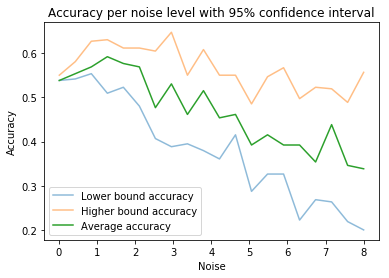

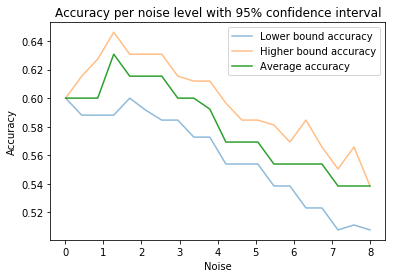

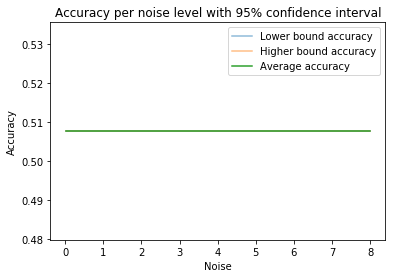

In [71]:
plot_accuracy_per_noise(data_xbox, big_hit_per_year_xbox, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 2)
plot_accuracy_per_noise(data_xbox, big_hit_per_year_xbox, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 1)
plot_accuracy_per_noise(data_xbox, big_hit_per_year_xbox, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, 2, 1, 0)

### accuracy over noise for Playstation games

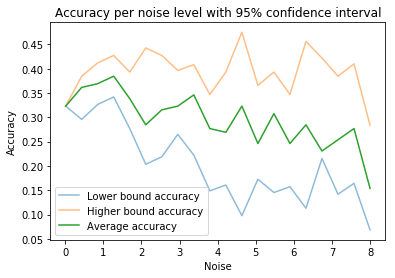

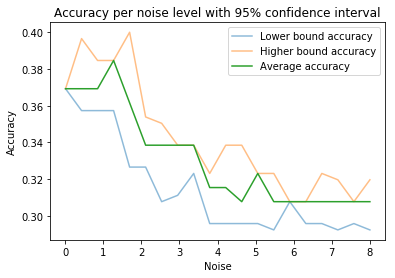

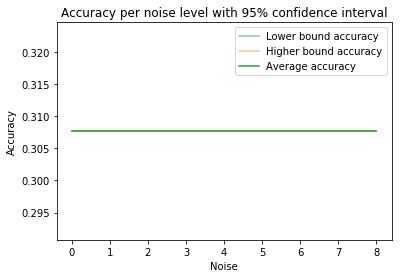

In [72]:
plot_accuracy_per_noise(data_playstation, big_hit_per_year_playstation, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 2)
plot_accuracy_per_noise(data_playstation, big_hit_per_year_playstation, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 1)
plot_accuracy_per_noise(data_playstation, big_hit_per_year_playstation, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, 2, 1, 0)

### accuracy over noise for Nintendo games

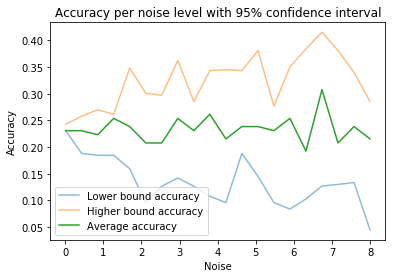

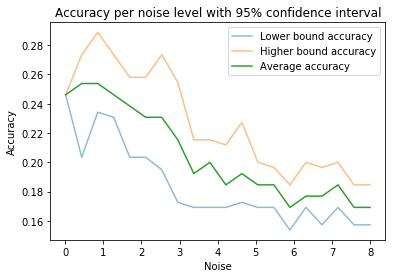

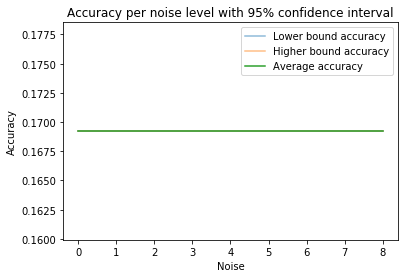

In [73]:
plot_accuracy_per_noise(data_nintendo, big_hit_per_year_nintendo, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 2)
plot_accuracy_per_noise(data_nintendo, big_hit_per_year_nintendo, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 1)
plot_accuracy_per_noise(data_nintendo, big_hit_per_year_nintendo, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, 2, 1, 0)

### accuracy over noise for PC games

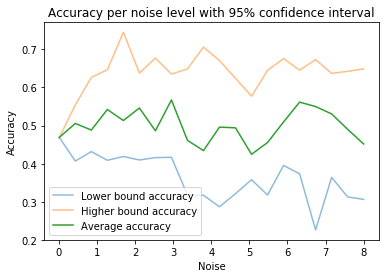

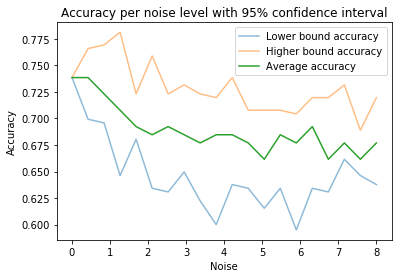

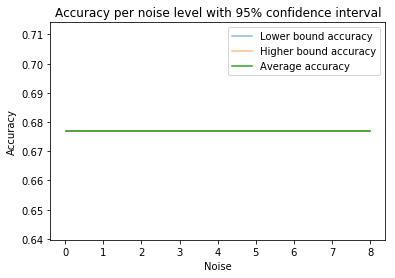

In [74]:
plot_accuracy_per_noise(data_pc, big_hit_per_year_pc, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 2)
plot_accuracy_per_noise(data_pc, big_hit_per_year_pc, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 1)
plot_accuracy_per_noise(data_pc, big_hit_per_year_pc, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, 2, 1, 0)

### accuracy over noise for all games

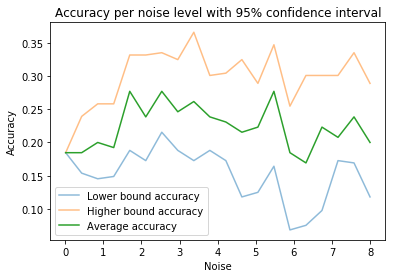

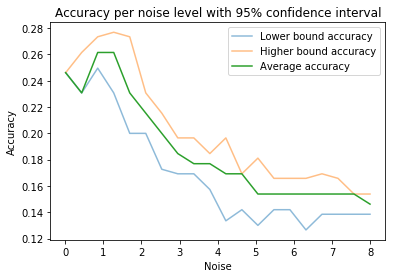

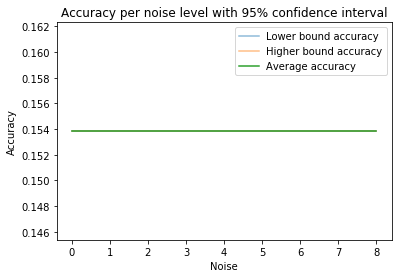

In [75]:
plot_accuracy_per_noise(data, big_hit_per_year, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 2)
plot_accuracy_per_noise(data, big_hit_per_year, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, noise_steps, times, 1)
plot_accuracy_per_noise(data, big_hit_per_year, top_size,\
                        key_score, year_min, year_max, noise_min, noise_max, 2, 1, 0)

## Time series of sales per game per genre
This shows the sales of a genre over time by plotting the sales of each game over time, per genre

In [ ]:
import statsmodels.api as sm
days_per_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
genres = get_unique_from_data(key_genre, data)

def get_continuous_year(game):
    y = int(game[key_release_y])
    m = int(game[key_release_m])
    d = int(game[key_release_d])
    return y + m / 12 + (d / 12) / days_per_month[m - 1]

def plot_sales_over_time_for_genre(genre, data, year_min = 2002, year_max = 2014, year_predict = 2018, plot_points = False, alpha_exp = 0.2):
    dates = []
    min_date = 9999
    max_date = 0
    sales = []
    for row in data:
        if row[key_genre] == genre:
            year = int(row[key_release_y])
            if year <= year_max and year >= year_min:
                date = get_continuous_year(row)
                dates.append(date)
                sales.append(row[key_global] * 1000000)

                if min_date > date:
                    min_date = date
                if max_date < date:
                    max_date = date            
    
    if(len(sales) < 2):
        return
    else:
        results = sm.OLS(sales, sm.add_constant(dates)).fit()
        x_line = np.linspace(min_date, max_date, 100)
        y_line = [x * results.params[1] + results.params[0] for x in x_line]
        x_predict = np.linspace(max_date, year_predict, 100)
        y_predict = [x * results.params[1] + results.params[0] for x in x_predict]
        if plot_points:
            plt.scatter(dates, sales, label = genre)
        plt.plot(x_line, y_line, label = genre + ' LRM', alpha = results.rsquared_adj ** alpha_exp)  
        plt.plot(x_predict, y_predict, label = 'predicted ' + genre + ' LRM', alpha = results.rsquared_adj ** alpha_exp)    
    
def show_sales_over_time_per_genre(data, year_min = 2002, year_max = 2014, year_predict = 2018, plot_points = False):
    plt.figure(figsize=(20, 10))
    for g in genres:
        plot_sales_over_time_for_genre(g, data, year_min, year_max, year_predict, plot_points)
    plt.xlabel('time')
    plt.ylabel('sales')
    plt.title('sales over time per genre')
    plt.legend()
    plt.show()
    
    

## Xbox

In [ ]:
show_sales_over_time_per_genre(data_xbox)

## Playstation

In [ ]:
show_sales_over_time_per_genre(data_playstation)

## Nintendo

In [ ]:
show_sales_over_time_per_genre(data_nintendo)

## PC

In [ ]:
show_sales_over_time_per_genre(data_pc)

## All

In [ ]:
show_sales_over_time_per_genre(data)